<center>
    <h1> Wprowadzenie do transformacji PCA </h1>
</center>


Wygenerować dane (1000 punktów) na płaszczyźnie z 2-wymiarowego rozkładu normalnego o niediagonalnej macierzy kowariancji i narysować je.

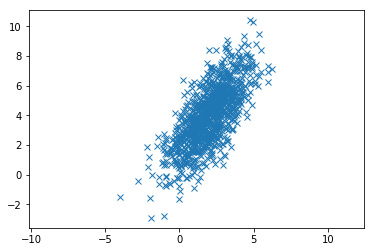

In [110]:
import matplotlib.pyplot as plt
import numpy as np

n = 1000
mean = [2, 4]
A=np.array([[1,1],[0,2]])
cov = np.matmul(A, np.transpose(A)) #cov = A*A^T
X = np.random.multivariate_normal(mean, cov, n)

plt.plot(X[:, 0], X[:, 1], 'x')
plt.axis('equal')
plt.show()

Pytamy się, które współrzędne są najważniejsze - opisują najwięcej informacji o naszych danych. Do tego celu możnaby użyć poznanych metod selekcji atrybutów (na którymś z wcześniejszych zajęć).

Widać, że dane sa skorelowane - wzrost pierwszego atrybuty pociąga za sobą wzrost drugiego. Dlatego rozsądniej mówić jest o kierunku który jest najważniejszy dla opisu naszych danych. Do tego celu używa się metody analizy głównych składowych (principal component analysis PCA).

Pierwszym krokiem jest normalizacja danych. Jako, że atrybut 1 może mieć inną skalę niż atrybut 2, konieczne jest ujednolicenie skal. Dokunujemy tego w dwóch krokach:

-przesuwamy dane do środka układu współrzędnych

-normalizujemy dane (dzielimy każdą współrzędną przez średnią długość wszyskich punktów)

Możemy to zrobić używając scalera.

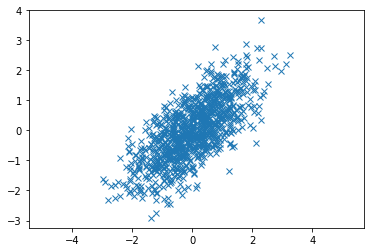

In [94]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

plt.plot(X_std[:, 0], X_std[:, 1], 'x')
plt.axis('equal')
plt.show()

Wygląd naszych danych jest niemal identyczny jak poprzednio. Jedyna zmiana polega na zmianie skali. Tak naprawdę odchylenie standardowe na każdym atrybucie wynosi 1. 


Proszę sprawdzić, jakie jest odchylenie standardowe na każdej współrzędnej.

In [95]:
np.cov(X_std.T)

array([[ 1.001001  ,  0.71333214],
       [ 0.71333214,  1.001001  ]])



Aby wyznaczyć kierunki decydujące o kształcie naszych danych, należy policzyć wektory i wartości wałasne z macierzy kowariancji.

Definicja: Dla macierzy kwadratowej $A$, wektor własny $v$ i wartość własna $\lambda$ spełnia: 
$$
Av = \lambda v
$$

Zilustrujemy powyższe wielkości na przykładzie.

In [96]:
cov_mat = np.cov(X_std.T)
print('Macierz kowariancji: \n%s' %cov_mat)

eig_vals, eig_vecs = np.linalg.eigh(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Macierz kowariancji: 
[[ 1.001001    0.71333214]
 [ 0.71333214  1.001001  ]]
Eigenvectors 
[[ 0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]]

Eigenvalues 
[ 0.28766886  1.71433314]


Narysujmy oba wektory na naszych danych przeskalowane przez odpowiadające im wartości własne.

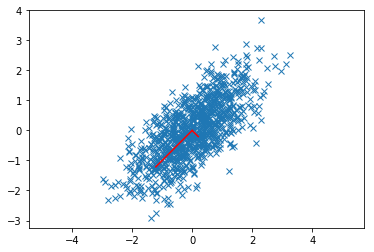

In [97]:
plt.plot(X_std[:, 0], X_std[:, 1], 'x')
for i in range(2):
    plt.plot([0, eig_vals[i]*eig_vecs[i,0]], [0, eig_vals[i]*eig_vecs[i,1]], 'r')
plt.axis('equal')
plt.show()

Co zrobiliśmy (trochę matematyki)? 

Przedstawiliśmy macierz kowariancji $\Sigma$ w postaci iloczynu:
$$
\Sigma = V S V^T
$$
gdzie $V$ to macierz zawierająca na kolumnach wektory własne, a $S$ to macierz diagonalna, która na przekątnej ma wartości własne.

Zweryfikować powyższe stwierdzenie tzn. sprawdzić, że powyższy iloczyn rzeczywiście daje macierz kowariancji.

In [98]:
print("Iloczyn macierzy: \n", np.dot(np.dot(eig_vecs, np.diag(eig_vals)), eig_vecs.T))
print("Macierz kowariancji: \n", cov_mat)

Iloczyn macierzy: 
 [[ 1.001001    0.71333214]
 [ 0.71333214  1.001001  ]]
Macierz kowariancji: 
 [[ 1.001001    0.71333214]
 [ 0.71333214  1.001001  ]]


Wyznaczanie wektorów i wartości własnych macierzy kowariancji danych, to podstawa PCA. Metoda PCA wykorzystuje znalezone kierunki (wektory własne) do dekorelacji danych (obrotu wokół układu współrzędnych)



In [99]:

# lista krotek (eigenvalue, eigenvector)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) 
             for i in range(len(eig_vals))]

# Sortowanie (eigenvalue, eigenvector)
eig_pairs.sort()
eig_pairs.reverse()

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.71433314323
0.287668858775


Możemy przedstawić nasze dane za pomocą kierunków głównych (wektorów głównych). Intuicyjnie jest to po prostu obrót danych, tak aby wektory własne pokrywały się z głównymi osiami układu współrzędnych.



In [100]:
W = np.hstack((eig_pairs[0][1].reshape(-1,1), 
                      eig_pairs[1][1].reshape(-1,1)))

print('Macierz W:\n', W)


Y = X_std.dot(W)
Y[:, 0] = Y[:, 0] * -1

print(X_std[:6,:], '\n')
print(Y[:6, :])

Macierz W:
 [[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]
[[ 1.53935127  1.26125883]
 [-1.13598397 -0.57901592]
 [-1.22713051 -1.96783956]
 [ 1.63989147  0.57288238]
 [ 1.97614714  0.7779545 ]
 [-1.04557194  0.23094425]] 

[[ 1.98033039  0.19664105]
 [-1.21268805 -0.39383588]
 [-2.259185    0.52376039]
 [ 1.56466739  0.75448936]
 [ 1.94744395  0.84725014]
 [-0.57602876 -0.90263326]]


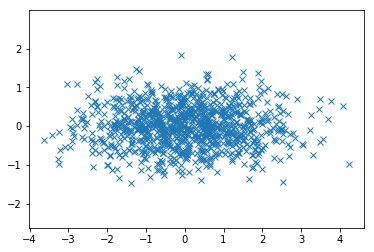

In [101]:
plt.plot(Y[:, 0], Y[:, 1], 'x')
plt.axis('equal')
plt.show()

Proszę wykonać PCA używając sklearn

In [67]:
from sklearn.decomposition import PCA as pca
pca_model = pca(n_components=2)
pca_model.fit(X_std)



PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Jak otrzymać wektory i wartości własne? Kryją się pod atrybutami components\_ i explained\_variance\_

In [18]:
print(pca_model.explained_variance_)
print(pca_model.components_)

[1.68830439 0.31369761]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


Możemy przedstawić nasze dane za pomocą kierunków głównych (wektorów głównych). Intuicyjnie jest to po prostu obrót danych, tak aby wektory własne pokrywały się z głównymi osiami układu współrzędnych.

Redukcja wymiarowości to rzutowanie danych na podprzestrzeń wyznaczoną przez wybrane wektory własne i jest to po prostu mnożenie macierzy:
$$
X V_k
$$
gdzie $V_k=(v_1,\ldots,v_k)$ to macierz gdzie w kolumnach są wektory własne.

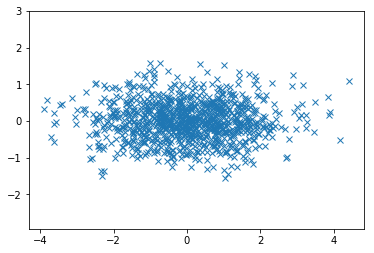

In [9]:
Y = pca_model.transform(X_std)
plt.plot(Y[:, 0], Y[:, 1], 'x')
plt.axis('equal')
plt.show()

W konsekwencji nasze dane są zdekorelowane - obróciliśmy dane tak że atrybuty nie są między soba zależne (liniowo).

Poza zmianą atrybutów (układu współrzędnych) możemy również ograniczyć się do najważniejszych atrybutów, np. tylko do pierwszej współrzędnej. Wówczas rzutujemy dane na atrybut 1. W sklearn robimy to ustawiając paraemtr n\_components na 1

In [10]:
pca_model = pca(n_components=1)
Y = pca_model.fit_transform(X_std)
print(Y)

[[-8.58297576e-01]
 [-2.16601540e+00]
 [-3.70220997e-01]
 [ 1.04276099e+00]
 [ 1.40747649e+00]
 [ 1.21211962e+00]
 [-1.02641216e+00]
 [ 1.58921560e+00]
 [-4.33486834e-01]
 [ 5.00822464e-01]
 [ 1.20035820e+00]
 [-2.63368164e-01]
 [ 8.19833596e-01]
 [-6.33857961e-01]
 [ 1.64113629e+00]
 [-9.72771271e-01]
 [ 4.77844762e-01]
 [ 2.31781263e+00]
 [-4.90477600e-01]
 [-1.08521408e+00]
 [-6.65538488e-01]
 [ 9.54527665e-01]
 [ 8.40566318e-01]
 [ 1.91289990e+00]
 [ 9.63874897e-01]
 [ 9.29891031e-01]
 [-6.69970025e-01]
 [ 9.83106338e-01]
 [-9.02631077e-01]
 [ 5.90094048e-01]
 [-1.60915850e-01]
 [-2.44530322e+00]
 [-2.13714869e+00]
 [ 5.67309957e-01]
 [-8.33019372e-02]
 [ 1.39455004e+00]
 [-1.49089570e-01]
 [ 1.59434471e+00]
 [ 7.15682502e-01]
 [-2.08914266e-01]
 [-5.28629705e-01]
 [-2.17464470e+00]
 [ 5.27908237e-01]
 [ 1.41667302e+00]
 [ 3.34386613e-02]
 [ 1.86297659e-01]
 [ 7.64509091e-01]
 [ 8.87423850e-01]
 [-1.95959013e+00]
 [ 2.86429897e-02]
 [ 7.22923947e-01]
 [ 1.45032862e+00]
 [-1.6419635

Zobaczmy na histogram zredukowanych danych - w dalszym ciągu mają kształt gaussowski.

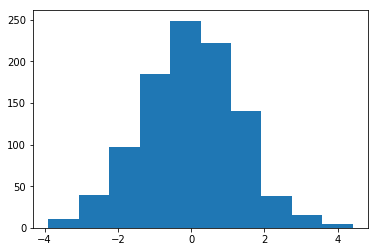

In [11]:

plt.hist(Y, bins=10)
plt.show()

Proszę sprawdzić czy dane przed PCA były niezależne oraz czy po PCA stały się niezależne - prosze przeprowadzić odpowiedni test statystyczny.

ZADANIE: Proszę pobrać dane dwóch akcji z https://archive.ics.uci.edu/ml/datasets/ISTANBUL+STOCK+EXCHANGE. Liczymy macierz kowariancji tych danych. Sprawdzamy testem czy jest w nich zależność. Jeśli tak to próbujemy dekorekować PCA i pytamy się czy zależność zniknęła. Rysujemy na płaszczyźnie w celu ilustracji.

Co nam daje PCA tu? Wyznaczamy kierunek największej zmiany np. $a S_A + b S_B$, gdzie $S_A,S_B$ to akcje - to jest po prostu pierwszy wektor własny. Zatem jeśli oczekujemy dużych zysków (ale też strat) to powinniśmy inwestować $a$ w akcję $A$ i $b$ w akcję $B$.

In [64]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    filepath_or_buffer='datasets/stock.csv', 
    header=None, 
    sep=';')

data = df.iloc[2:,3:5].values 



d = [[val.replace(',', '.') for val in row] for row in data]
X = np.array(d).astype(float)
print(X)


[[-0.00467931  0.00219342]
 [ 0.00778674  0.00845534]
 [-0.03046913 -0.01783306]
 ..., 
 [ 0.00192291  0.00287211]
 [-0.02074215 -0.01423886]
 [ 0.         -0.00047267]]


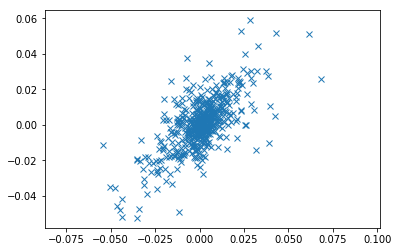

In [65]:
plt.plot(X[:,0], X[:,1], 'x')
plt.axis('equal')
plt.show()

ZADANIE: Proszę sprawdzić testem statystycznym czy dane są niezależne (przed dekorelacją i po dekorelacji

In [130]:
#TODO  - jest na końcu pokazane 

Dane mogą być zdekorelowane ale nadal zależne. Proszę wygenerować półksiężyć i zdekorelować - zobaczyć że zależność nadal istnieje.

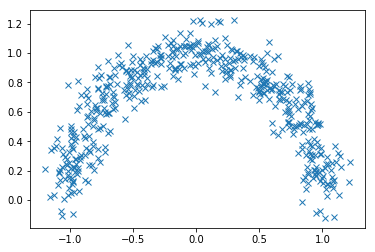

In [123]:
from sklearn.datasets.samples_generator import make_moons
import matplotlib.pyplot as plt

# generate 2d classification dataset#
X, y = make_moons(n_samples=1000, noise=0.1)
X0 = X[y==0]
plt.plot(X0[:,0], X0[:,1], 'x')
plt.show()

ZADANIE: Proszę sprawdzić testem statystycznym czy dane są zależne (przed i po dekorelacji)

W praktycem jeśli dane nie są zdekorelowane, to metody uczenia mają tendencję do większych błędów niż gdyby dane były zdekorelowane.  

Mimo dokonania dekorelacji, nowe atrybuty mają różne skale. Jest to problem dla metod bazujących na odległościd - odległość na atrybucie o mniejszej skali jest zawsze mniejsza niż na tym o większej. 

ZADANIE: Proszę spróbować znaleźć najbliższych sąsiadów dla punktu przed sklaowaniem danych i porównać ich dla tego samego punktu po skalowaniu.



In [71]:
#TODO

Dlatego po PCA często skaluje się nowe atrybuty (dzieli przez pierwiastki wartości własnych). Robimy z danych kulkę:)

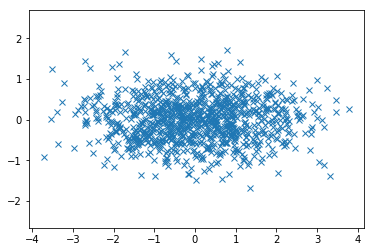

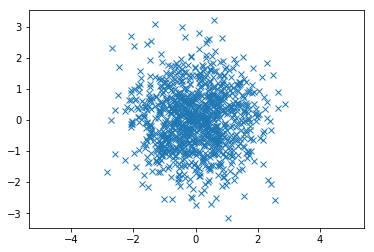

In [72]:
pca_model = pca(n_components=2)
Y = pca_model.fit_transform(X_std)
plt.plot(Y[:, 0], Y[:, 1], 'x')
plt.axis('equal')
plt.show()

import math

Z = Y
Z[:,0] = Z[:,0]/math.sqrt(pca_model.explained_variance_[0])
Z[:,1] = Z[:,1]/math.sqrt(pca_model.explained_variance_[1])
plt.plot(Z[:, 0], Z[:, 1], 'x')
plt.axis('equal')
plt.show()

Można to samo uzyskać ustawiając prametr whiten na true

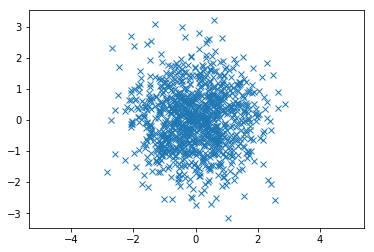

In [73]:
pca_model = pca(n_components=2, whiten = True)
Y = pca_model.fit_transform(X_std)
plt.plot(Y[:, 0], Y[:, 1], 'x')
plt.axis('equal')
plt.show()

In [124]:
X=X0

In [131]:
#do testu chi2 trzeba confusion matrix

#Tworzymy biny (bo mamy zmienne ciągłe)
h1 = np.histogram(X[:,0].flatten())
h2 = np.histogram(X[:,1].flatten())
print(h1[0])
print(h1[1])
h1[1].shape[0]

[56 67 46 41 43 42 33 58 78 36]
[-1.19361619 -0.95261987 -0.71162355 -0.47062723 -0.22963091  0.01136542
  0.25236174  0.49335806  0.73435438  0.9753507   1.21634703]


11

In [126]:
#liczymy do którego bina trafia kolejna wartość z pierwszej współrzędnej

print(h1[1].shape[0])
res1 = np.zeros(X.shape[0])
# print(res)
for i in range(X.shape[0]):
    res1[i] = 0
    for j in range(h1[1].shape[0]):
#         print(X[i,0], " ", h1[1][j])
        if X[i,0] > h1[1][j]:
            res1[i] = j+1
            
print(res1)

11
[  3.   6.   1.   9.   6.   6.  10.  10.   4.   9.   7.   3.   9.   9.   8.
   1.   7.   5.   2.   2.   1.  10.   9.   1.   8.   6.  10.   3.   7.   1.
   8.   9.   7.   3.   2.   9.   3.   6.   1.   6.   8.   5.   6.   5.   6.
   7.   4.   8.   1.  10.   1.   3.   4.   3.   2.   8.   0.   3.   9.   9.
   3.   4.   1.   1.   2.   3.   2.   1.   1.   5.   3.   9.   6.   9.   7.
   8.   8.   6.   4.   8.   5.   8.   8.   5.   1.   3.   3.   3.   1.   5.
   5.   8.   2.   9.   6.   1.   8.   6.   9.   2.  10.   9.   1.   3.   7.
   2.   3.   2.   8.   4.   8.   8.  10.   9.  10.   9.   8.   7.   9.   4.
   8.   7.   7.   9.   3.   1.   4.   9.  10.   6.   4.   8.   2.   9.   2.
   8.   6.   6.   1.   2.  10.   5.   6.   1.   6.   2.   7.   7.  10.   1.
   4.   3.   3.   7.   4.   9.   8.   6.   5.  10.   8.   1.   9.   3.   9.
  10.   5.   5.   9.   4.   3.   6.   1.   2.   1.   3.   9.   4.   1.   2.
  10.   2.   2.   7.   3.   9.  10.  10.   4.   3.   5.   3.   1.   2.   6.
   2.   4

In [127]:
#liczymy do którego bina trafia kolejna wartość z drugiej współrzędnej

print(h2[1].shape[0])
res2 = np.zeros(X.shape[0])
# print(res)
for i in range(X.shape[0]):
    res2[i] = 0
    for j in range(h2[1].shape[0]):
#         print(X[i,0], " ", h1[1][j])
        if X[i,1] > h2[1][j]:
            res2[i] = j+1
            
print(res2)


11
[  7.   9.   3.   7.   9.   9.   3.   3.   9.   5.   9.   8.   5.   4.   7.
   3.   8.   8.   5.   6.   5.   3.   5.   3.   5.   9.   4.   7.   7.   1.
   7.   4.   8.   7.   4.   7.   9.   8.   2.   8.   7.   8.   8.   9.   9.
   8.   7.   6.   3.   3.   4.   8.   8.   8.   3.   7.   3.   6.   3.   5.
   8.   8.   7.   3.   7.   6.   7.   2.   3.   8.   6.   3.   9.   4.   9.
   8.   7.   9.   7.   7.   8.   7.   7.   9.   3.   6.   7.   7.   3.   8.
   9.   7.   6.   5.  10.   4.   7.  10.   5.   5.   3.   5.   2.   8.  10.
   7.   9.   6.   7.   9.   6.   7.   3.   3.   3.   7.   8.   8.   7.   9.
   8.   9.   8.   5.   7.   4.   8.   5.   4.   8.   7.   9.   2.   5.   4.
   8.   8.   7.   2.   7.   2.   9.   9.   1.   9.   6.   9.   8.   0.   5.
   6.   6.   8.   8.   7.   3.   7.   8.   9.   2.   9.   4.   5.   5.   1.
   3.   9.   8.   2.   8.   7.   9.   4.   6.   1.   7.   4.   7.   4.   2.
   3.   7.   3.   7.   7.   5.   2.   1.   9.   9.   8.   8.   2.   5.   9.
   6.   9

In [128]:
#confusion matrix

table = pd.crosstab(res1, res2)
table

col_0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
row_0,,,,,,,,,,,
0.0,0,0,0,1,0,0,0,0,0,0,0
1.0,0,4,12,19,12,7,0,1,0,0,0
2.0,0,0,3,8,12,11,17,12,4,0,0
3.0,0,0,0,0,0,3,7,16,17,3,0
4.0,0,0,0,0,0,0,2,10,18,10,1
5.0,0,0,0,0,0,0,0,0,15,24,4
6.0,0,0,0,0,0,0,0,2,12,22,6
7.0,0,0,0,0,0,0,0,7,12,13,1
8.0,0,0,0,0,0,6,7,31,9,5,0


In [132]:
#przeprowadzamy test

from scipy.stats import chi2_contingency
chi2_contingency(table)

#jesli p-value (druga wartosc) jest mala (bliska zero) to odrzucamy hipoteze o niezaleznosci, jesli duze to nie ma podstaw do odrzucenia

(679.55138416766397,
 5.6104092764965221e-87,
 100,
 array([[  2.00000000e-03,   1.60000000e-02,   6.00000000e-02,
           1.08000000e-01,   8.80000000e-02,   9.80000000e-02,
           9.40000000e-02,   1.80000000e-01,   1.76000000e-01,
           1.54000000e-01,   2.40000000e-02],
        [  1.10000000e-01,   8.80000000e-01,   3.30000000e+00,
           5.94000000e+00,   4.84000000e+00,   5.39000000e+00,
           5.17000000e+00,   9.90000000e+00,   9.68000000e+00,
           8.47000000e+00,   1.32000000e+00],
        [  1.34000000e-01,   1.07200000e+00,   4.02000000e+00,
           7.23600000e+00,   5.89600000e+00,   6.56600000e+00,
           6.29800000e+00,   1.20600000e+01,   1.17920000e+01,
           1.03180000e+01,   1.60800000e+00],
        [  9.20000000e-02,   7.36000000e-01,   2.76000000e+00,
           4.96800000e+00,   4.04800000e+00,   4.50800000e+00,
           4.32400000e+00,   8.28000000e+00,   8.09600000e+00,
           7.08400000e+00,   1.10400000e+00],
        